1. Introduction
2. Data cleaning
3. Read in and merge the two data sets (tip: think of different CSV formats that exist)
4. Clean the data: remove impossible values
5. Create the variable mean steps per participant. Hint: combine Pandas .loc and .mean() with the right axis argument (axis=....) for mean(). Look up the documentation of .loc and Pandas .mean() if you're unsure. 
6. Show the head() of the resulting data frame
7. Exploratory data analysis. An analysis of mean steps per participant:
    - Graph of the distribution (e.g., histogram, box plot, density plot, violin plot)
    - Summary statistics (measure of central tendency and variation, e.g., mean, median, standard deviation)
    - Verbal description of the distribution, including commenting on normality, skewness, outliers, etc.
    - The relation of mean steps per participant with two categorical variables (e.g. gender, age, education)
    - Graph of the relation (e.g. histograms, box plots, density plots, violin plots). Try a different plot this time.
    - Describe and interpret the results

8. Feature engineering
9. The prediction of the model can be improved by computing a variable that gives a better indication of a healthy weight than weight alone. Can you think of one? If not, just skip this step.
10. Exploratory data analysis
    - See last week for the first part (distribution of steps). In addition:
    - Make a scatterplot matrix of the numerical variables
    - Make a correlation matrix of the numerical variables
    - Describe and interpret the results

11. Predictive model
12. Explain linear regression in your own words
13. Create dummy variables for the categorical variables
14. Fit a linear regression model to predict the mean steps per participant, using the training data. You can include all variables (easy), or you can try to find the combination that gives you the best fit (harder).
15. Evaluation
    - Evaluate the model on the test data
    - Predictive power of the model (R2, RMSE)
    - Investigate the residuals
16. Describe and interpret the results

# Introduction

In [85]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [30]:
df_steps = pd.read_csv("steps.csv", delimiter=";")
df_survey = pd.read_csv("survey.csv")

In [4]:
df_steps.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_steps.shape

(929, 329)

In [17]:
df_steps.describe()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
count,929.000000,24.000000,243.000000,278.000000,296.000000,354.000000,353.000000,328.000000,380.000000,419.000000,...,83.000000,78.000000,56.000000,56.000000,49.000000,71.000000,86.000000,81.000000,66.000000,0.0
mean,465.000000,3642.416667,9034.724280,10889.636691,7402.847973,8110.370056,8690.810198,8362.570122,8261.913158,9231.391408,...,8466.686747,6897.923077,8434.303571,9870.107143,7209.693878,9570.690141,7614.848837,6805.925926,7505.530303,NaN
std,268.323499,3951.910368,6412.774483,6283.204309,6733.291773,5495.536639,4843.885824,5762.374515,4325.239676,5282.031304,...,6923.674171,5915.429173,4960.932295,6812.625746,7539.387846,7264.297875,5521.711875,8458.979146,4706.609481,NaN
min,1.000000,164.000000,67.000000,25.000000,43.000000,11.000000,154.000000,7.000000,4.000000,9.000000,...,726.000000,12.000000,90.000000,88.000000,8.000000,664.000000,103.000000,12.000000,388.000000,NaN
25%,233.000000,299.500000,4395.500000,6524.250000,2726.750000,4428.250000,5212.000000,4496.000000,5261.250000,5679.000000,...,3538.000000,2082.000000,5525.750000,5629.500000,3393.000000,5149.000000,3950.000000,2510.000000,4932.000000,NaN
50%,465.000000,834.000000,8561.000000,9980.000000,5652.000000,7740.000000,8299.000000,7638.000000,8147.000000,8844.000000,...,5386.000000,6460.000000,7834.500000,9331.000000,5378.000000,7235.000000,6627.000000,3120.000000,6568.500000,NaN
75%,697.000000,6060.000000,12182.000000,14338.750000,10472.750000,10464.000000,11386.000000,11910.000000,11000.000000,12140.500000,...,11811.000000,9899.000000,11691.000000,14239.250000,8907.000000,12062.500000,10031.500000,6544.000000,9549.000000,NaN
max,929.000000,11157.000000,44944.000000,39165.000000,40392.000000,29862.000000,23902.000000,31254.000000,23836.000000,43238.000000,...,28703.000000,26654.000000,26660.000000,38400.000000,37530.000000,33379.000000,27605.000000,36031.000000,33660.000000,NaN


In [5]:
df_survey.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [7]:
df_survey.shape

(929, 9)

In [24]:
df_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           929 non-null    int64  
 1   city         929 non-null    object 
 2   gender       929 non-null    object 
 3   age          929 non-null    object 
 4   hh_size      929 non-null    int64  
 5   education    929 non-null    int64  
 6   education_1  929 non-null    object 
 7   height       928 non-null    float64
 8   weight       927 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 65.4+ KB


In [25]:
df_survey.describe()

,id,hh_size,education,height,weight
count,929.000000,929.000000,929.000000,928.000000,927.000000
mean,465.000000,2.342304,2.530678,171.668103,72.833873
std,268.323499,1.226129,1.274491,9.080235,25.902717
min,1.000000,1.000000,1.000000,145.000000,6.000000
25%,233.000000,1.000000,1.000000,165.000000,61.000000
50%,465.000000,2.000000,2.000000,172.000000,71.000000
75%,697.000000,3.000000,4.000000,179.000000,81.000000
max,929.000000,11.000000,5.000000,195.000000,700.000000


In [34]:
df_survey["hh_size"].value_counts()

2     355
1     251
3     138
4     124
5      50
6       5
11      1
Name: hh_size, dtype: int64

In [41]:
df_survey["age"].value_counts()


25-34    425
35-44    175
45-54    147
<25      123
55-64     46
65+        7
Name: age, dtype: int64

In [35]:
df_survey["education"].value_counts()


2    333
4    283
1    233
5     39
3     36
Name: education, dtype: int64

In [40]:
df_survey["education_1"].value_counts()


Master or doctorate    408
Bachelor               357
High school            105
Vocational              39
Primary                 13
No degree                1
Name: education_1, dtype: int64

# Data cleaning

In [39]:
df_survey = df_survey[(df_survey["hh_size"] != 11)]

In [43]:
# Filtering some weights

df_survey = df_survey[(df_survey["weight"] < 170) & (df_survey["weight"] > 25)]

In [32]:
df_survey['height'].fillna(method='ffill', inplace=True)

In [33]:
df_steps.replace(0, np.nan, inplace=True)

# Merging

In [48]:
df = df_survey.merge(df_steps, on="id")
df.set_index("id", inplace=True)
df.head()

,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,21-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
id,,,,,,,,,,,,,,,,,,,,,
1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,11428.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Mean

In [50]:
df['step_mean'] = df.iloc[:, 9:220].mean(axis=1)

In [52]:
df.replace(np.nan, 0, inplace=True)

In [53]:
df.head()

,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,21-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,step_mean
id,,,,,,,,,,,,,,,,,,,,,
1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10205.521212
2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5687.423313
3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,0.0,11428.0,...,4364.0,0.0,0.0,0.0,6227.0,4567.0,2567.0,1129.0,0.0,8598.884892
4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3733.562500
5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5840.485714


# EDA

Text(0.5, 1.0, 'Distribution of mean steps per participant')

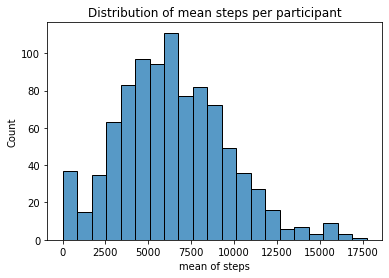

In [60]:
sns.histplot(df["step_mean"])
plt.xlabel("mean of steps")
plt.title("Distribution of mean steps per participant")

Text(0.5, 1.0, 'Distribution of mean steps per participant')

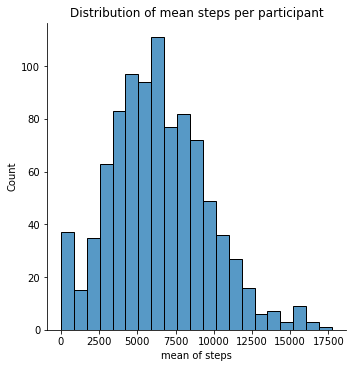

In [64]:
sns.displot(df["step_mean"])
plt.xlabel("mean of steps")
plt.title("Distribution of mean steps per participant")

c:\Users\amoosi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of mean steps per participant')

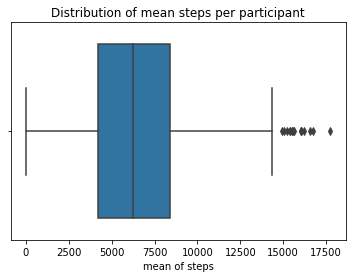

In [61]:
sns.boxplot(df["step_mean"])
plt.xlabel("mean of steps")
plt.title("Distribution of mean steps per participant")

There are some outliers that have more than 15000 mean step value

c:\Users\amoosi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of mean steps per participant')

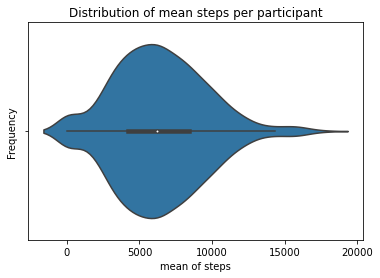

In [65]:
sns.violinplot(df["step_mean"])
plt.xlabel("mean of steps")
plt.ylabel("Frequency")
plt.title("Distribution of mean steps per participant")

In [66]:
df['step_mean'].describe()

count      923.000000
mean      6399.890106
std       3175.552558
min          0.000000
25%       4207.850064
50%       6237.488000
75%       8398.309735
max      17739.842105
Name: step_mean, dtype: float64

c:\Users\amoosi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of mean step by age')

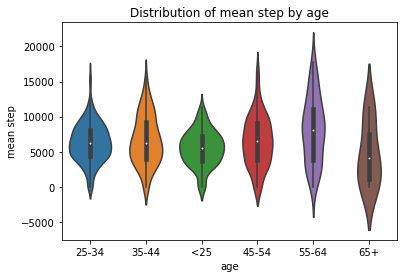

In [70]:
sns.violinplot(df["age"], df["step_mean"])
plt.ylabel("mean step")
plt.title("Distribution of mean step by age")

c:\Users\amoosi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of mean step by age')

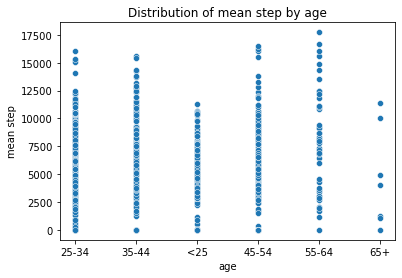

In [69]:
sns.scatterplot(df["age"], df["step_mean"])
plt.ylabel("mean step")
plt.title("Distribution of mean step by age")

c:\Users\amoosi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of mean step by age')

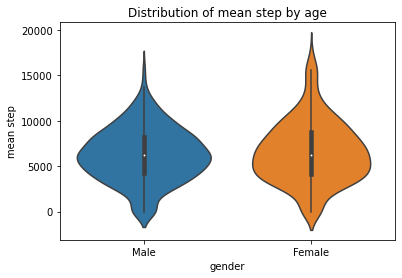

In [71]:
sns.violinplot(df["gender"], df["step_mean"])
plt.ylabel("mean step")
plt.title("Distribution of mean step by age")

c:\Users\amoosi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of mean step by age')

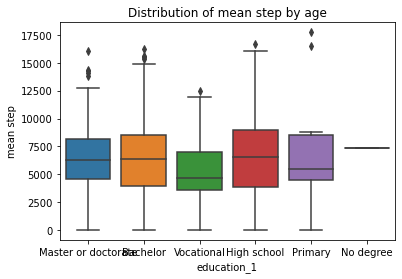

In [73]:
sns.boxplot(df["education_1"], df["step_mean"])
plt.ylabel("mean step")
plt.title("Distribution of mean step by age")

In [75]:
df_num = df[['height', 'weight', 'step_mean']]
df_num.head()

,height,weight,step_mean
id,,,
1,178.0,98.0,10205.521212
2,180.0,77.0,5687.423313
3,180.0,83.0,8598.884892
4,178.0,80.0,3733.562500
5,167.0,61.0,5840.485714


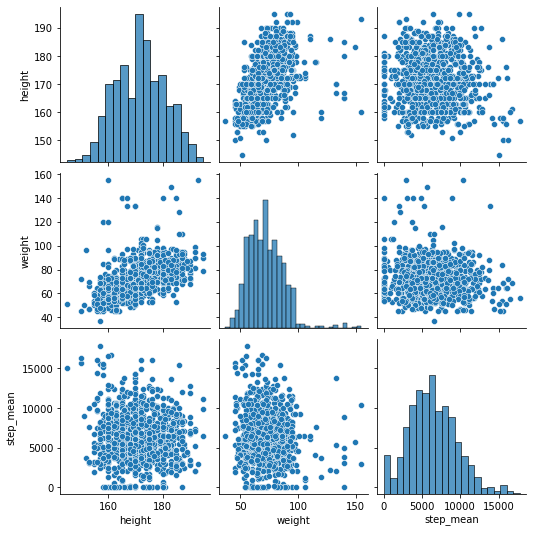

In [76]:
sns.pairplot(df_num)

Text(0.5, 1.0, 'The corrilation between the numerical values and mean step')

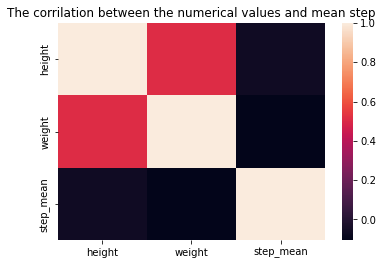

In [78]:
sns.heatmap(df_num.corr())
plt.title("The corrilation between the numerical values and mean step")

# Prediction

In [80]:
# encoding categorical columns
pp_df = pd.get_dummies(df, columns=['gender', 'city', 'education_1', 'age'])
pp_df.head()

,hh_size,education,height,weight,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,...,education_1_Master or doctorate,education_1_No degree,education_1_Primary,education_1_Vocational,age_25-34,age_35-44,age_45-54,age_55-64,age_65+,age_<25
id,,,,,,,,,,,,,,,,,,,,,
1,4,4,178.0,98.0,0.0,0.0,0.0,0.0,3941.0,15733.0,...,1,0,0,0,1,0,0,0,0,0
2,1,3,180.0,77.0,0.0,0.0,10473.0,705.0,4287.0,5507.0,...,0,0,0,0,0,1,0,0,0,0
3,2,2,180.0,83.0,0.0,11428.0,12523.0,2553.0,190.0,2164.0,...,1,0,0,0,1,0,0,0,0,0
4,1,1,178.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
5,3,4,167.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0


In [82]:
X = pp_df.drop("step_mean", axis=1)
y = pp_df["step_mean"]

In [86]:
# Spliting the dataset to train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2) 


In [88]:
X_train.shape

(738, 350)

In [89]:
X_test.shape

(185, 350)

In [93]:
# Scaling the values
scaler = MinMaxScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)


In [91]:
linear_model = LinearRegression()
linear_model.fit(X_train_sc, y_train)

LinearRegression()

In [94]:
y_pred = linear_model.predict(X_test_sc)

In [95]:
r2_score(y_test, y_pred)

0.0971889648241695

In [96]:
mean_squared_error(y_test, y_pred)

8977864.19578918